In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from itertools import chain
from functools import partial
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm
import pickle

In [3]:
from evolving_comm_network import *

In [4]:
#plt.rcParams["animation.html"] = "jshtml"

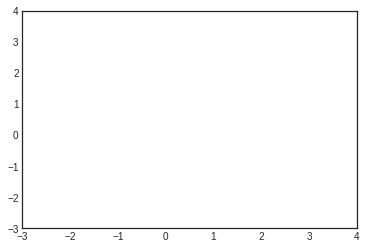

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-3, 4), ylim=(-3, 4))
particles_d, = ax.plot([], [], 'bo', ms=2)
particles_c, = ax.plot([], [], 'ro', ms=2)
#parents, = ax.plot([], [], 'ro', ms=4)

# initialization function: plot the background of each frame
def init():
    particles_c.set_data([], [])
    particles_d.set_data([], [])
    #parents.set_data([], [])
    return particles_c,particles_d

# animation function.  This is called sequentially
def animate(i):
    global locs,loc_c,loc_d
    x_c = [z[0] for z in loc_c[i]]
    y_c = [z[1] for z in loc_c[i]]
    particles_c.set_data(x_c,y_c)
    x_d = [z[0] for z in loc_d[i]]
    y_d = [z[1] for z in loc_d[i]]
    particles_d.set_data(x_d,y_d)
    return particles_c,particles_d

In [6]:
PD1 = Simulation_PD(150, 40, bernoulli_arms, discounted_thompson, 500, False, True, 1)

Progress: [#########################] 100.0%
Duration: 0:03:08


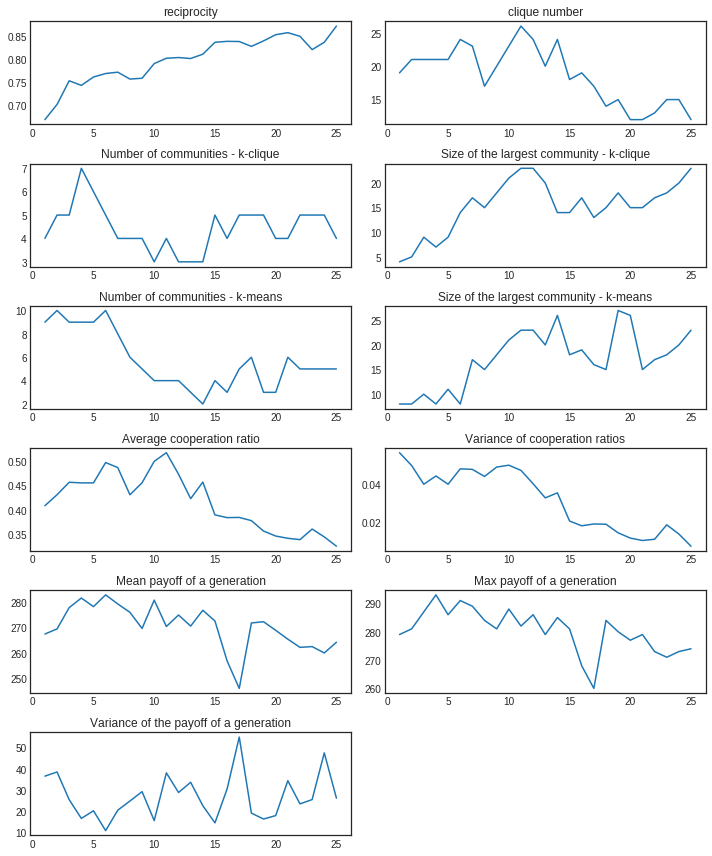

In [7]:
locs,loc_c,loc_d, size_cluster, coop_ratios, info_sharing_clusters, p_val = PD1.plot_data_mult_gen(True, 0.01)

In [8]:
clusters = np.array([list(i) for i in size_cluster])
coops = np.array([list(i) for i in coop_ratios])
#print (info_sharing_clusters)
sharing = np.array([i for i in info_sharing_clusters])
#print (p_val)
p = np.array([list(i) for i in p_val])

with open('loc_c_100_ind_500_gen_dens.txt', 'wb') as handle:
    pickle.dump(loc_c, handle)

with open('loc_d_100_ind_500_gen_dens.txt', 'wb') as handle:
    pickle.dump(loc_d, handle)
    
with open('clusters_100_ind_500_gen_dens.txt', 'wb') as handle:
    pickle.dump(clusters, handle)

with open('coops_100_ind_500_gen_dens.txt', 'wb') as handle:
    pickle.dump(coops, handle)
    
with open('info_groups_100_ind_500_gen_dens.txt', 'wb') as handle:
    pickle.dump(sharing, handle)

with open('p_100_ind_500_gen_dens.txt', 'wb') as handle:
    pickle.dump(p, handle)

In [9]:
def plot_density(ptraj, tlist, ustep=10, ax=None):
    dist = np.zeros((ustep-1,ptraj.shape[1]))
    bin_min, bin_max = ptraj.min(), ptraj.max()
    bins = np.linspace(bin_min, bin_max, ustep)
        
    for t, traits in enumerate(ptraj.transpose()):
        dist[:,t], _ = np.histogram(traits, bins=bins)

    if ax is None:
        fig,ax = plt.subplots(1,1,figsize=(20,5))
    dmask = dist
    dmask[dmask==0] = np.nan
    mp = ax.imshow(dmask,aspect='auto', 
                   extent=[tlist.min(),tlist.max(),bin_min, bin_max],
                   cmap='viridis',
                   origin='bottom')
    ax.set(xlabel='Time',ylabel='Trait')
    cax = make_axes_locatable(ax).append_axes("right", size="1%", pad=0.1)
    ax.get_figure().colorbar(label='density', cax=cax, ax=ax, mappable=mp)

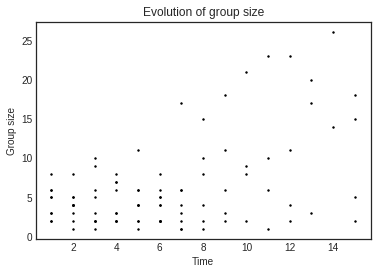

<Figure size 432x288 with 0 Axes>

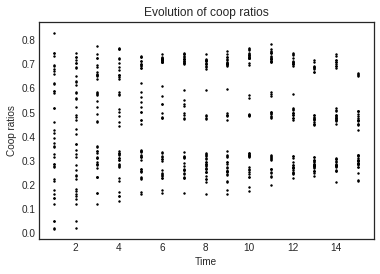

<Figure size 432x288 with 0 Axes>

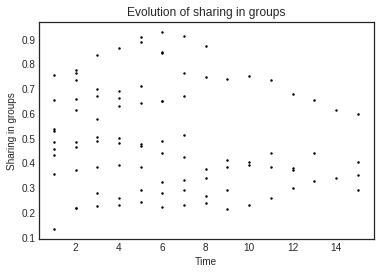

<Figure size 432x288 with 0 Axes>

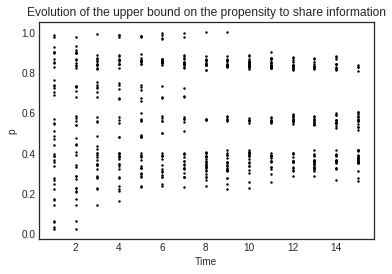

In [10]:
t_list = [i for i in range(1,16)]
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(clusters[t-1]))],clusters[t-1],marker='o', s=2, color='k')
plt.ylabel('Group size')
plt.xlabel('Time')
plt.title('Evolution of group size')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(coops[t-1]))],coops[t-1], marker='o', s=2, color='k')
plt.ylabel('Coop ratios')
plt.xlabel('Time')
plt.title('Evolution of coop ratios')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(sharing[t-1]))],sharing[t-1], marker='o', s=2, color='k')
plt.ylabel('Sharing in groups')
plt.xlabel('Time')
plt.title('Evolution of sharing in groups')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(p[t-1]))],p[t-1], marker='o', s=2, color='k')
plt.ylabel('p')
plt.xlabel('Time')
plt.title('Evolution of the upper bound on the propensity to share information')
plt.show()

In [12]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=300, blit=True)
rc('animation', html='html5')
anim